In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import h5py

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import importlib

## Set Training Label

In [5]:
label = 'NewSim_TypeSelfAttention'

## Find all files

In [6]:
from glob import glob

In [11]:
# files_loc = "/sdf/home/r/rafaeltl/home/rafaeltl/Muon/Feb15/si-mu-lator/batch_slac/out_files/March24_bkgr_2375000/"
files_loc = "/gpfs/slac/atlas/fs1/u/rafaeltl/Muon/Apr2022/si-mu-lator/batch_slac/out_files/bkgr_1/"

In [12]:
# files_bkg = glob(files_loc+'*Muon*bkgr*70000.0*.h5')
files_bkg = glob(files_loc+'*NoMuon*.h5')
files_sig = glob(files_loc+'*WithMuon*.h5')
all_files = files_bkg+files_sig

## Open files

In [13]:
import dataprep
importlib.reload(dataprep)

<module 'dataprep' from '/gpfs/slac/atlas/fs1/u/rafaeltl/Muon/Feb15/si-mu-lator/nn/notebooks/dataprep.py'>

In [14]:
data, dmat, Y, Y_mu, Y_hit, sig_keys = dataprep.make_data_matrix(all_files, max_files=500, sort_by='z')

/gpfs/slac/atlas/fs1/u/rafaeltl/Muon/Apr2022/si-mu-lator/batch_slac/out_files/bkgr_1/NoMuon.atlas_mm_road.nevs_1000.bkgr_1_Rnd780520.h5
['is_muon', 'x', 'y', 'z', 'ptype', 'ptilt', 'poffset', 'time', 'projX_at_rightend_x', 'projX_at_rightend_y', 'projX_at_middle_x', 'projX_at_middle_y', 'projY_at_topend_x', 'projY_at_topend_y', 'projY_at_middle_x', 'projY_at_middle_y', 'seg_ix', 'rdrift']
/gpfs/slac/atlas/fs1/u/rafaeltl/Muon/Apr2022/si-mu-lator/batch_slac/out_files/bkgr_1/NoMuon.atlas_mm_road.nevs_1000.bkgr_1_Rnd780564.h5
/gpfs/slac/atlas/fs1/u/rafaeltl/Muon/Apr2022/si-mu-lator/batch_slac/out_files/bkgr_1/NoMuon.atlas_mm_road.nevs_1000.bkgr_1_Rnd780552.h5
/gpfs/slac/atlas/fs1/u/rafaeltl/Muon/Apr2022/si-mu-lator/batch_slac/out_files/bkgr_1/NoMuon.atlas_mm_road.nevs_1000.bkgr_1_Rnd780470.h5
/gpfs/slac/atlas/fs1/u/rafaeltl/Muon/Apr2022/si-mu-lator/batch_slac/out_files/bkgr_1/NoMuon.atlas_mm_road.nevs_1000.bkgr_1_Rnd780551.h5
/gpfs/slac/atlas/fs1/u/rafaeltl/Muon/Apr2022/si-mu-lator/batch_s

In [15]:
Y_mu.shape

(161770,)

In [16]:
sig_keys

['is_muon',
 'x',
 'y',
 'z',
 'ptype',
 'ptilt',
 'poffset',
 'time',
 'projX_at_rightend_x',
 'projX_at_rightend_y',
 'projX_at_middle_x',
 'projX_at_middle_y',
 'projY_at_topend_x',
 'projY_at_topend_y',
 'projY_at_middle_x',
 'projY_at_middle_y',
 'seg_ix',
 'rdrift']

In [17]:
dmat[:,:,sig_keys.index('time')] = dmat[:,:,sig_keys.index('time')].astype(int)
dmat[:,:,sig_keys.index('time')] = dmat[:,:,sig_keys.index('time')].astype(float)

In [18]:
dmat[:,:,sig_keys.index('z')]

array([[7728.1,  -99. ,  -99. , ...,  -99. ,  -99. ,  -99. ],
       [7695. , 7728.1,  -99. , ...,  -99. ,  -99. ,  -99. ],
       [7683.5,  -99. ,  -99. , ...,  -99. ,  -99. ,  -99. ],
       ...,
       [7552.5, 7564. , 7585.7, ..., 7695. , 7716.7, 7728.1],
       [7552.5, 7564. , 7585.7, ..., 7695. , 7716.7, 7728.1],
       [7552.5, 7564. , 7585.7, ..., 7695. , 7716.7, 7728.1]])

In [19]:
dmat[:,:,sig_keys.index('is_muon')]

array([[  0., -99., -99., ..., -99., -99., -99.],
       [  0.,   0., -99., ..., -99., -99., -99.],
       [  0., -99., -99., ..., -99., -99., -99.],
       ...,
       [  1.,   1.,   1., ...,   0.,   1.,   1.],
       [  1.,   1.,   1., ...,   1.,   1.,   1.],
       [  1.,   1.,   1., ...,   1.,   1.,   1.]])

IndexError: index 16 is out of bounds for axis 0 with size 16

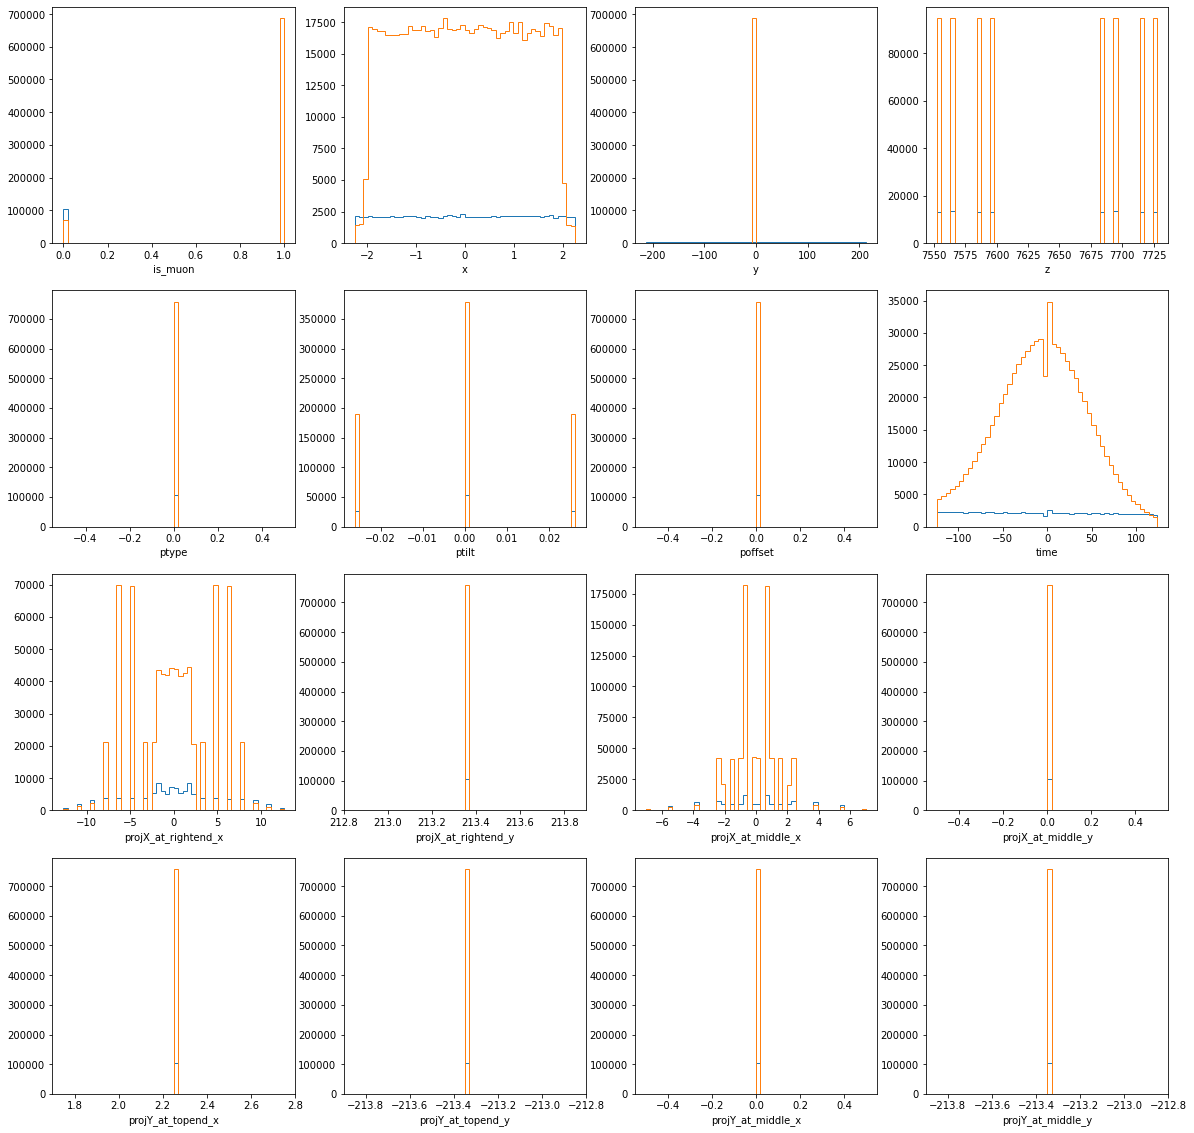

In [20]:
fig, axs = plt.subplots(4, 4, figsize=(20,20))
axs = axs.flatten()

for ivar in range(dmat.shape[2]):

    valid_hits_mu   = dmat[Y_mu == 1,:,sig_keys.index('is_muon')].flatten() > -90
    valid_hits_nomu = dmat[Y_mu == 0,:,sig_keys.index('is_muon')].flatten() > -90

    this_var_mu   = dmat[Y_mu == 1,:,ivar].flatten()[valid_hits_mu]
    this_var_nomu = dmat[Y_mu == 0,:,ivar].flatten()[valid_hits_nomu]
    
    this_max = np.max([*this_var_mu, *this_var_nomu])
    this_min = np.min([*this_var_mu, *this_var_nomu])
        
    axs[ivar].hist( this_var_nomu, histtype='step', range=(this_min, this_max), bins=50, label = 'No muon Evts'  )
    axs[ivar].hist( this_var_mu, histtype='step', range=(this_min, this_max), bins=50, label = 'Muon Evts' )    

    axs[ivar].set_xlabel(sig_keys[ivar])
    
    if ivar == dmat.shape[2] - 1:
        axs[ivar].legend()
    
plt.show()

In [21]:
vars_of_interest = np.zeros(dmat.shape[2], dtype=bool)

training_vars = [ 'z', 'ptilt', 'time', 'projX_at_rightend_x', 'projX_at_middle_x' ]

for tv in training_vars:
    vars_of_interest[sig_keys.index(tv)] = 1

In [22]:
X = dmat[:,:,vars_of_interest]

In [23]:
X.shape

(161770, 8, 5)

In [24]:
Y_mu.sum()

100000

## Define network

In [25]:
import sys

In [26]:
sys.path.insert(0, '../')

In [27]:
import models

In [28]:
lambs = [1]
mymods = []

for ll in lambs:
    # mymodel = models.muon_nn_type2( (X.shape[1],X.shape[2]), ll)
    # mymodel = models.muon_nn_selfatt( (X.shape[1],X.shape[2]), ll)
    # mymodel = models.muon_nn_type0( (X.shape[1],X.shape[2]))
    mymodel = models.muon_nn_selfatt_muonly( (X.shape[1],X.shape[2]))
    # mymodel = models.recurrent_model( (X.shape[1],X.shape[2]))
    mymods.append(mymodel)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 8, 5)]       0                                            
__________________________________________________________________________________________________
masking_1 (Masking)             (None, 8, 5)         0           inputs[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 8, 5)         20          masking_1[0][0]                  
__________________________________________________________________________________________________
Phi_0_Dense (TimeDistributed)   (None, 8, 50)        300         batch_normalization[0][0]        
______________________________________________________________________________________________

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y[:,0], test_size=0.33, random_state=42)

In [31]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [33]:
histories = []

for mod,ll in zip(mymods, lambs):
    history = mod.fit( X_train, Y_train,
                        callbacks = [
                                EarlyStopping(monitor='val_loss', patience=1000, verbose=1),
                                ModelCheckpoint(f'weights/{label}_ll_{ll}.h5', monitor='val_loss', verbose=True, save_best_only=True) ],
                        epochs=3000,
                        validation_split = 0.1,
                        batch_size=2**14,
                        verbose=1
                       )
    
    mod.load_weights(f'weights/{label}_ll_{ll}.h5')
    histories.append(history)

Epoch 1/3000


InternalError:  Attempting to perform BLAS operation using StreamExecutor without BLAS support
	 [[node model/Phi_0_Dense/dense/MatMul (defined at <ipython-input-32-6f1a7c82a160>:4) ]] [Op:__inference_train_function_1967]

Function call stack:
train_function


In [ ]:
for history,ll in zip(histories,lambs):
    
    plt.Figure()
    for kk in history.history.keys():
        plt.plot(history.history[kk], label=kk)
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Lambda = {ll}')
    plt.savefig(f'plots/{label}_loss_ll_{ll}.pdf')
    plt.show()

In [ ]:
Y_test.shape

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
for mod,ll in zip(mymods,lambs):
    
    Y_pred = mod.predict(X_test, verbose=1).flatten()
        
    plt.Figure()
    plt.hist(Y_pred[Y_test==0], histtype='step', bins=50, range=(0,1))
    plt.hist(Y_pred[Y_test==1], histtype='step', bins=50, range=(0,1))
    plt.yscale('log')
    plt.title(f'Lambda = {ll}')
    plt.savefig(f'plots/{label}_muon_pred_ll_{ll}.pdf')
    plt.show()
        
    plt.show()
    

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8) )
axs = axs.flatten()

coli = 3
icol = 0

for mod,ll in zip(mymods,lambs):
    
    Y_pred = mod.predict(X_test, verbose=1)
    # Y_pred_hits = Y_pred[:,1:]
    # Y_pred_mu = Y_pred[:,0]
    Y_pred_mu = Y_pred
    # Y_pred_hits_f_mu = Y_pred_hits[Y_test_mu==1].flatten()
    # Y_pred_hits_f_nomu = Y_pred_hits[Y_test_mu==0].flatten()
    
    # fpr_hits, tpr_hits, _     = roc_curve(Y_test_hits_f_mu[Y_test_hits_f_mu>-90], Y_pred_hits_f_mu[Y_test_hits_f_mu>-90])
    # axs[0].semilogy(tpr_hits, 1./fpr_hits, color=f'C{coli+icol}', label=f'lambda = {ll}')
    
    fpr_mus, tpr_mus, _     = roc_curve(Y_test, Y_pred_mu)
    axs[1].semilogy(tpr_mus, 1./fpr_mus, color=f'C{coli+icol}', label=f'lambda = {ll}')
    
    icol+=1
    
axs[0].set_ylabel('Background hits rejection')
axs[0].set_xlabel('Signal hits efficiency')
axs[0].legend()
axs[0].set_xlim(-0.01, 1.01)
axs[0].set_ylim(0.5, 1e6)

axs[1].set_ylabel('Rejection of events with no muons')
axs[1].set_xlabel('Efficiency of events with muons')
axs[1].set_xlim(0.8,1.01)
axs[1].set_ylim(0.5, 1e5)
axs[1].legend()


plt.savefig(f'plots/{label}_ROCs.pdf', transparent=True)
plt.show()